<a href="https://colab.research.google.com/github/muhamadfadil316/MACHINE-LEARNING/blob/main/Praktikum03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# menghubungan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/Colab Notebooks/praktikum_ml/praktikum03"

In [ ]:
# membaca file csv menggunakan pandas
import pandas as pd

df =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/praktikum_ml/praktikum03/data/socr.csv")
df.head()


,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
# mencari informasi umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [ ]:
# Menghitung statistik deskriptif pada kolom numeric dengan des
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [ ]:
# Data Pre-processing
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,      # in → cm
        berat_kg=lambda d: d["berat_kg"] * 0.45359237   # lb → kg
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
    .copy()
)

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [ ]:
# split data training 80% dan data testing 20%
from sklearn.model_selection import train_test_split

#variabel bebas
X = df1[["tinggi_cm"]]
y = df1["berat_kg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


In [ ]:
from sklearn.linear_model import LinearRegression

# membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):        ", model.intercept_)
print("R2 (test):            ", r2)
print("MAE (kg):             ", mean_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)  # default squared=True
rmse = np.sqrt(mse)
print("RMSE (kg):            ", rmse)

Koefisien (kg per cm): 0.5518232618278286
Intersep (kg):         -37.657088783833586
R2 (test):             0.24989263013277574
MAE (kg):              3.6704107898943548
RMSE (kg):             4.609006140308042


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

df_resume = pd.DataFrame()
df_resume['R2'] = [r2]
df_resume['Koefisien (kg/cm)'] = [model.coef_[0]]
df_resume['Intersep (kg)'] = [model.intercept_]
df_resume['MAE (kg)'] = [mean_absolute_error(y_test, y_pred)]
mse = mean_squared_error(y_test, y_pred)
df_resume['RMSE (kg)'] = [np.sqrt(mse)]

df_resume.head()

,R2,Koefisien (kg/cm),Intersep (kg),MAE (kg),RMSE (kg)
0,0.249893,0.551823,-37.657089,3.670411,4.609006


In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan: y = 0.552*x + -37.657


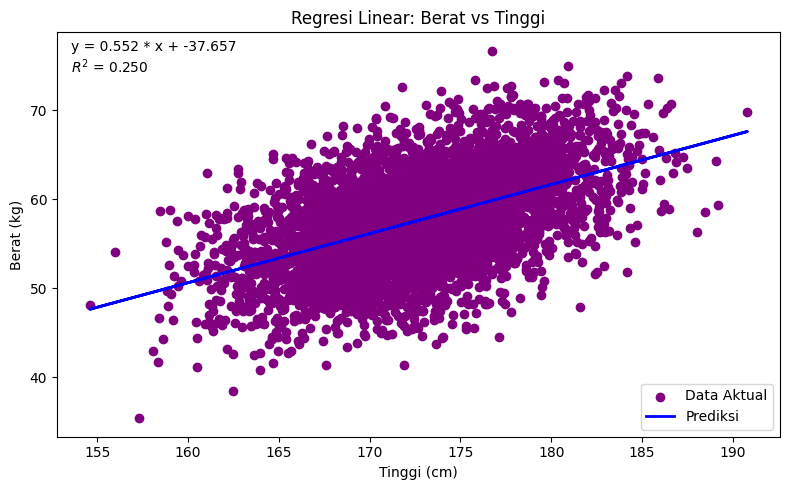

In [ ]:
import matplotlib.pyplot as plt

# Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="purple", label="Data Aktual")

# Garis regresi
plt.plot(X_test, y_pred, color="blue", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test)

# Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error|/|aktual|)), dibatasi 0–100
denom = hasil["Berat aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.16,58.762990,8.602990,82.848904
1,171.31,50.33,56.875754,6.545754,86.994329
2,169.29,58.22,55.761071,-2.458929,95.776488
3,163.30,58.92,52.455650,-6.464350,89.028598
4,170.52,63.06,56.439814,-6.620186,89.501766
...,...,...,...,...,...
4995,178.75,56.59,60.981319,4.391319,92.240114
4996,163.05,47.45,52.317694,4.867694,89.741425
4997,166.51,52.46,54.227003,1.767003,96.631715
4998,167.70,49.90,54.883672,4.983672,90.012681


In [ ]:
# membaca file csv menggunakan pandas
import pandas as pd

df =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/praktikum_ml/praktikum03/data/berat_ti2024.csv", sep=";")
df.head()

,no,nama,tinggi_cm,actual_berat,prediksi,akurasi
0,1,raffa,168,58.5,NaN,NaN
1,2,tiara,162,78.2,NaN,NaN
2,3,tiara,155,52.7,NaN,NaN
3,4,keyla,160,70.3,NaN,NaN
4,5,bani,183,65.8,NaN,NaN


In [ ]:
# ambil X-testing
X_testing = df["tinggi_cm"]
X_testing

,tinggi_cm
0,168
1,162
2,155
3,160
4,183


In [ ]:


df["prediksi"] = model.predict(df[["tinggi_cm"]])
df["selisih"] = df["actual_berat"] - df["prediksi"]

df["akurasi"] = (1 - df["selisih"] / df["actual_berat"]).clip(lower=0, upper=1) * 100
df

,no,nama,tinggi_cm,actual_berat,prediksi,akurasi,selisih
0,1,raffa,168,58.5,55.049219,94.101229,3.450781
1,2,tiara,162,78.2,51.738280,66.161483,26.461720
2,3,tiara,155,52.7,47.875517,90.845383,4.824483
3,4,keyla,160,70.3,50.634633,72.026505,19.665367
4,5,bani,183,65.8,63.326568,96.240985,2.473432


In [ ]:
# membaca file csv menggunakan pandas
import pandas as pd

df =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/praktikum_ml/praktikum03/data/stunting_wasting_dataset.csv", sep=",")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [ ]:
df1 = (
    df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
    .rename(columns={
        "Jenis Kelamin": "jk",
        "Umur (bulan)": "umur_bln",
        "Tinggi Badan (cm)": "tinggi_cm",
        "Berat Badan (kg)": "berat_kg"
    })
    .copy()
)

# Laki-laki: 1, Perempuan: 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})

df1.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [ ]:
# hitung matriks korelasi
corr_matrix = df1.corr()

print(corr_matrix)

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


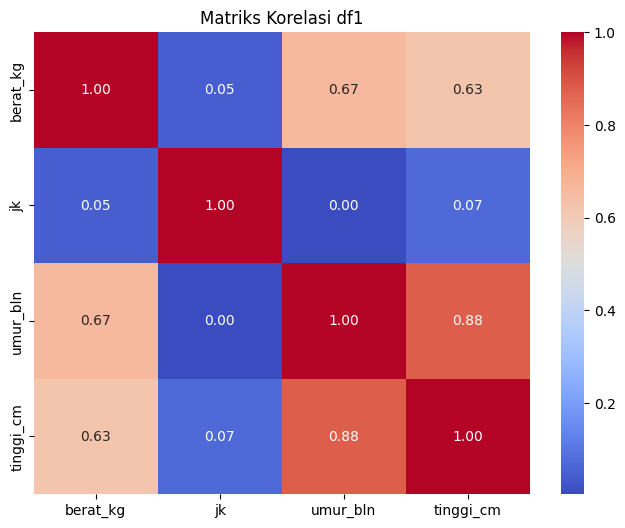

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Target (Y) adalah berat badan
y = df["Berat Badan (kg)"]

# Fitur (X) adalah umur dan tinggi
X = df[["Umur (bulan)", "Tinggi Badan (cm)"]]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # random_state supaya hasil konsisten
)

# Cetak pembagian data
print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))

# Cek contoh data training
X_train.head()

Jumlah data train : 80000
Jumlah data test  : 20000


,Umur (bulan),Tinggi Badan (cm)
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [ ]:
print(df.columns)

Index(['Jenis Kelamin', 'Umur (bulan)', 'Tinggi Badan (cm)',
       'Berat Badan (kg)', 'Stunting', 'Wasting'],
      dtype='object')


In [ ]:
import statsmodels.api as sm

# Tambahan konstanta (intercept)
X_train_constant = sm.add_constant(X_train)

# Lihat 5 baris pertama
X_train_constant.head()


,const,Umur (bulan),Tinggi Badan (cm)
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [ ]:
import statsmodels.api as sm

#buat model OLS
model = sm.OLS(y_train, X_train_constant).fit()
print('------------------------------')
print(model.params)
print('------------------------------')
const = model.params['const']
x1_umur = model.params['Umur (bulan)']
x2_tinggi = model.params['Tinggi Badan (cm)']

#print persamaan regresi
print(f"Persamaan regresi: y = {const:.3f} + {x1_umur:.3f} * x1 + {x2_tinggi:.3f} * x2")

------------------------------
const                2.545617
Umur (bulan)         0.229719
Tinggi Badan (cm)    0.054192
dtype: float64
------------------------------
Persamaan regresi: y = 2.546 + 0.230 * x1 + 0.054 * x2


In [ ]:
# tampilkan ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Berat Badan (kg)   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Mon, 06 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:00:37   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.5456      0.09

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [ ]:
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["Umur (bulan)"].to_numpy(),
    "Tinggi (cm)": X_test["Tinggi Badan (cm)"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# 2) Akurasi per-baris (100 × (1 - |error/aktual|)), dibatasi 0–100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845


In [3]:
# membaca file csv menggunakan pandas
import pandas as pd

df =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/praktikum_ml/praktikum03/data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/praktikum_ml/praktikum03/data/day.csv")

# Menentukan variabel dependen (Y)
Y = df["cnt"]

# Menentukan variabel independen (X)
# Menghapus kolom yang tidak relevan: instant, dteday, dan cnt
X = df.drop(columns=["instant", "dteday", "cnt"])

# Menampilkan hasil secara rapi
print("=" * 60)
print("📊 VARIABEL DEPENDEN (Y): 'cnt'")
print("=" * 60)
print(Y.head(), "\n")

print("=" * 60)
print("🧩 VARIABEL INDEPENDEN (X):")
print("=" * 60)
print(X.head())

print("\nJumlah kolom independen:", X.shape[1])
print("Jumlah total data:", len(df))


📊 VARIABEL DEPENDEN (Y): 'cnt'
0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64 

🧩 VARIABEL INDEPENDEN (X):
   season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

      atemp       hum  windspeed  casual  registered  
0  0.363625  0.805833   0.160446     331         654  
1  0.353739  0.696087   0.248539     131         670  
2  0.189405  0.437273   0.248309     120        1229  
3  0.212122  0.590435   0.160296     108        1454  
4  0.229270  0.436957   0.186900      82        1518  

Jumlah kolom independen: 13
Jumlah total data: 731
